In [166]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [125]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_6213e9bdbd6a4109965fd0f1aa556bc8 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='YmI0ZPBnnw3Pd_s88Z4qFFTPELcxf571vivRhgH2hJ0a',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6213e9bdbd6a4109965fd0f1aa556bc8.get_object(Bucket='datascience-donotdelete-pr-t25cfoypokr52o',Key='listings_summary.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,...,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,The neighbourhood is famous for its variety of...,...,t,NaN,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,https://www.airbnb.com/rooms/3309,20181107122246,2018-11-07,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,"My flat is in the middle of West-Berlin, direc...",...,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,https://www.airbnb.com/rooms/7071,20181107122246,2018-11-07,BrightRoom with sunny greenview!,Cozy and large room in the beautiful district ...,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,none,"Great neighborhood with plenty of Cafés, Baker...",...,t,NaN,NaN,f,f,moderate,f,f,1,1.75


In [126]:
df=df_data_2.copy()

In [127]:
df.shape

(22552, 96)

In [128]:
format(df.duplicated().sum()) # Check wether duplicate entries are their or not. here 0 represent no duplkicate data is their.

'0'

In [129]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [130]:
columns=['id','space','description','neighborhood_overview','property_type','room_type','accommodates','bathrooms',
         'bedrooms','beds','bed_type','amenities','square_feet','price','security_deposit','cleaning_fee','extra_people',
         'minimum_nights','review_scores_rating','instant_bookable','cancellation_policy']

In [131]:
temp_data=df[columns].set_index('id')

In [132]:
temp_data.head()

,space,description,neighborhood_overview,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$200.00,$30.00,$28.00,4,93.0,f,strict_14_with_grace_period
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,NaN,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,$0.00,2,100.0,f,flexible
3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$200.00,$50.00,$20.00,62,92.0,t,strict_14_with_grace_period
3309,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,"My flat is in the middle of West-Berlin, direc...",Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$250.00,$30.00,$18.00,5,88.0,f,strict_14_with_grace_period
7071,"The BrightRoom is an approx. 20 sqm (215ft²), ...",Cozy and large room in the beautiful district ...,"Great neighborhood with plenty of Cafés, Baker...",Apartment,Private room,2,1.0,1.0,2.0,Real Bed,"{Wifi,Heating,""Family/kid friendly"",Essentials...",NaN,$42.00,$0.00,$0.00,$24.00,2,96.0,f,moderate


In [133]:
temp_data.isnull().sum(axis=0)

space                     8532
description                203
neighborhood_overview    11012
property_type                0
room_type                    0
accommodates                 0
bathrooms                   32
bedrooms                    18
beds                        40
bed_type                     0
amenities                    0
square_feet              22106
price                        0
security_deposit          9361
cleaning_fee              7146
extra_people                 0
minimum_nights               0
review_scores_rating      4389
instant_bookable             0
cancellation_policy          0
dtype: int64

In [134]:
temp_data.security_deposit.fillna('$0.00', inplace=True) 

In [135]:
temp_data.cleaning_fee.fillna('$0.00',inplace=True)

In [137]:
temp_data[['security_deposit','cleaning_fee']].isnull().sum(axis=0)

security_deposit    0
cleaning_fee        0
dtype: int64

In [138]:
temp_data.head(3)

,space,description,neighborhood_overview,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,cancellation_policy
id,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,$200.00,$30.00,$28.00,4,93.0,f,strict_14_with_grace_period
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,NaN,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,$0.00,$0.00,$0.00,2,100.0,f,flexible
3176,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,The neighbourhood is famous for its variety of...,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$200.00,$50.00,$20.00,62,92.0,t,strict_14_with_grace_period


In [139]:
temp_data.room_type.value_counts()

Private room       11534
Entire home/apt    10722
Shared room          296
Name: room_type, dtype: int64

In [140]:
temp_data.dtypes

space                     object
description               object
neighborhood_overview     object
property_type             object
room_type                 object
accommodates               int64
bathrooms                float64
bedrooms                 float64
beds                     float64
bed_type                  object
amenities                 object
square_feet              float64
price                     object
security_deposit          object
cleaning_fee              object
extra_people              object
minimum_nights             int64
review_scores_rating     float64
instant_bookable          object
cancellation_policy       object
dtype: object

In [141]:
temp_data.price=list(map(lambda x: x.replace(',',''),temp_data.price))

In [150]:
temp_data.security_deposit=list(map(lambda x: x.replace(',',''),temp_data.security_deposit))

In [151]:
temp_data.cleaning_fee=list(map(lambda x: x.replace(',',''),temp_data.cleaning_fee))

In [152]:
temp_data['price'].value_counts()

030.00      1387
035.00      1256
050.00      1247
040.00      1191
025.00      1121
045.00       894
060.00       843
055.00       638
020.00       622
070.00       571
080.00       557
065.00       529
075.00       411
0100.00      401
039.00       399
049.00       362
029.00       332
090.00       323
028.00       296
022.00       269
059.00       267
069.00       266
085.00       257
032.00       255
0120.00      254
038.00       251
027.00       238
042.00       226
023.00       206
095.00       203
            ... 
0227.00        1
0525.00        1
0136.00        1
01900.00       1
0418.00        1
09000.00       1
0174.00        1
08600.00       1
0379.00        1
01.00          1
0455.00        1
01875.00       1
03000.00       1
0444.00        1
0182.00        1
0480.00        1
01250.00       1
0421.00        1
0161.00        1
01500.00       1
0188.00        1
01050.00       1
0258.00        1
0237.00        1
0439.00        1
0330.00        1
0268.00        1
0228.00       

In [153]:
temp_data.price=list(map(lambda x: x.replace('$','0'),temp_data.price))

In [154]:
temp_data.security_deposit=list(map(lambda x: x.replace('$','0'),temp_data.security_deposit))

In [155]:
temp_data.cleaning_fee=list(map(lambda x: x.replace('$','0'),temp_data.cleaning_fee))

In [156]:
temp_data['security_deposit'].value_counts()

00.00       14680
0100.00      1716
0200.00      1425
0150.00       864
0500.00       817
0300.00       755
0250.00       465
0400.00       273
01000.00      250
090.00        127
0350.00       113
0600.00       101
0800.00        99
01500.00       77
02000.00       68
085.00         64
0700.00        39
0120.00        37
0108.00        35
0450.00        31
0180.00        28
01200.00       25
03000.00       25
0750.00        24
086.00         23
0900.00        22
04000.00       21
088.00         19
095.00         15
0190.00        15
            ...  
0690.00         1
0215.00         1
0505.00         1
01326.00        1
0802.00         1
02600.00        1
093.00          1
0216.00         1
0229.00         1
0155.00         1
01255.00        1
0211.00         1
0213.00         1
0102.00         1
0817.00         1
0195.00         1
0275.00         1
0575.00         1
0420.00         1
0170.00         1
0187.00         1
0128.00         1
0480.00         1
04253.00        1
0775.00   

In [157]:
temp_data['cleaning_fee'].value_counts()

00.00       9011
020.00      1812
010.00      1633
030.00      1530
015.00      1423
050.00      1060
025.00      1046
040.00       861
05.00        649
035.00       550
060.00       319
045.00       287
080.00       150
08.00        138
012.00       135
070.00       114
0100.00      113
019.00        86
065.00        83
055.00        77
018.00        77
029.00        74
049.00        68
075.00        67
036.00        66
09.00         66
04.00         66
07.00         64
039.00        61
0150.00       55
            ... 
0180.00        4
097.00         3
0106.00        3
086.00         3
087.00         3
0190.00        3
056.00         3
088.00         2
0450.00        2
031.00         2
0280.00        2
0175.00        2
0105.00        2
063.00         2
076.00         2
0299.00        1
0420.00        1
084.00         1
0300.00        1
0119.00        1
041.00         1
0135.00        1
0320.00        1
064.00         1
0108.00        1
02000.00       1
0166.00        1
0129.00       

In [158]:
temp_data['price'].value_counts()

030.00      1387
035.00      1256
050.00      1247
040.00      1191
025.00      1121
045.00       894
060.00       843
055.00       638
020.00       622
070.00       571
080.00       557
065.00       529
075.00       411
0100.00      401
039.00       399
049.00       362
029.00       332
090.00       323
028.00       296
022.00       269
059.00       267
069.00       266
085.00       257
032.00       255
0120.00      254
038.00       251
027.00       238
042.00       226
023.00       206
095.00       203
            ... 
0227.00        1
0525.00        1
0136.00        1
01900.00       1
0418.00        1
09000.00       1
0174.00        1
08600.00       1
0379.00        1
01.00          1
0455.00        1
01875.00       1
03000.00       1
0444.00        1
0182.00        1
0480.00        1
01250.00       1
0421.00        1
0161.00        1
01500.00       1
0188.00        1
01050.00       1
0258.00        1
0237.00        1
0439.00        1
0330.00        1
0268.00        1
0228.00       

In [159]:
temp_data[['price','security_deposit','cleaning_fee']]=temp_data[['price','security_deposit','cleaning_fee']].astype(float)

In [160]:
temp_data['Total_price']=temp_data[['security_deposit','cleaning_fee','price']].sum(axis=1)

In [161]:
temp_data.head(2)

,space,description,neighborhood_overview,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,...,square_feet,price,security_deposit,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable,cancellation_policy,Total_price
id,,,,,,,,,,,,,,,,,,,,,
2015,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,It is located in the former East Berlin area o...,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,...,NaN,60.0,200.0,30.0,$28.00,4,93.0,f,strict_14_with_grace_period,290.0
2695,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,NaN,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,...,NaN,17.0,0.0,0.0,$0.00,2,100.0,f,flexible,17.0


In [162]:
avg_perRoom=temp_data.groupby(['room_type'])['price'].agg(np.mean)
#data.groupby(['neighbourhood','room_type'])['price'].agg(['mean'])

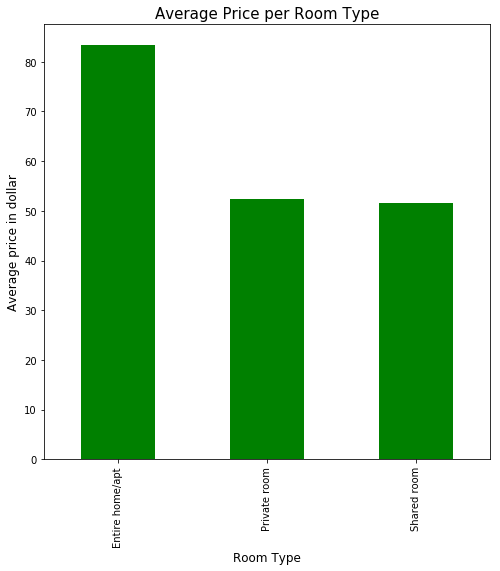

In [177]:
avg_perRoom.plot(kind='bar', figsize=(8,8), fontsize=10,color='green')
plt.title("Average Price per Room Type",fontsize=15)
plt.xlabel("Room Type",fontsize=12)
plt.ylabel("Average price in dollar",fontsize=12)
plt.show()

### Above graph shows that Average amount we have to pay per Room Type

# Room Type, Bed Type and it's count

In [180]:
temp_data.bed_type.value_counts()

Real Bed         21766
Pull-out Sofa      451
Futon              240
Couch               72
Airbed              23
Name: bed_type, dtype: int64

In [216]:
bed_perRoom=temp_data.groupby(['room_type'])['bed_type']

In [203]:
bed_perRoom.value_counts()

room_type        bed_type     
Entire home/apt  Real Bed         10469
                 Pull-out Sofa      144
                 Futon               71
                 Couch               29
                 Airbed               9
Private room     Real Bed         11024
                 Pull-out Sofa      295
                 Futon              166
                 Couch               39
                 Airbed              10
Shared room      Real Bed           273
                 Pull-out Sofa       12
                 Airbed               4
                 Couch                4
                 Futon                3
Name: bed_type, dtype: int64

# Room Type, Property and its count

In [236]:
property_type_perRoom=temp_data.groupby(['room_type'])['property_type']
                 

In [237]:
property_type_perRoom.value_counts()

room_type        property_type         
Entire home/apt  Apartment                  9479
                 Loft                        360
                 Condominium                 345
                 House                       166
                 Serviced apartment          164
                 Guesthouse                   48
                 Guest suite                  37
                 Townhouse                    31
                 Bungalow                     18
                 Boat                         16
                 Other                        12
                 Houseboat                    10
                 Camper/RV                     9
                 Tiny house                    6
                 Cabin                         5
                 Villa                         5
                 Cottage                       4
                 Barn                          1
                 Bed and breakfast             1
                 Castle      

# Room Type and it's Average Review Score

In [238]:
score_perRoom=temp_data.groupby(['room_type'])['review_scores_rating'].agg(np.mean)



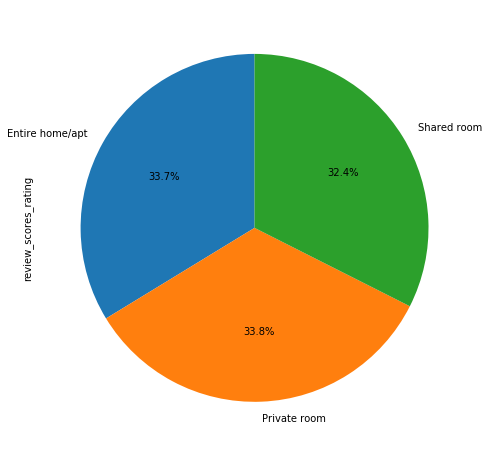

In [243]:
score_perRoom.plot(kind='pie',autopct="%1.1f%%",startangle=90,figsize=(8,8))

### Above Fig shows that Private and Entire home/apt has same average score